# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers

In [3]:
# Load Data 
dataset = pd.read_csv("compresive_strength_concrete.csv")
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Check Missing Values 
dataset.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [5]:
dataset = dataset.astype("float32")

dataset.dtypes

Cement (component 1)(kg in a m^3 mixture)                float32
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float32
Fly Ash (component 3)(kg in a m^3 mixture)               float32
Water  (component 4)(kg in a m^3 mixture)                float32
Superplasticizer (component 5)(kg in a m^3 mixture)      float32
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float32
Fine Aggregate (component 7)(kg in a m^3 mixture)        float32
Age (day)                                                float32
Concrete compressive strength(MPa, megapascals)          float32
dtype: object

In [6]:
# Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
train_size = int(dataset.shape[0] * 0.5)
test_size = int(dataset.shape[0] * 0.3) + train_size

y = np.asarray(dataset[["Concrete compressive strength(MPa, megapascals) "]])
x = np.asarray(dataset.drop(["Concrete compressive strength(MPa, megapascals) "], axis=1))

y_train, y_test, y_validation = y[:train_size], y[train_size:test_size], y[test_size:]
x_train, x_test, x_validation = x[:train_size], x[train_size:test_size], x[test_size:]
input_shape = x_train[0].shape

In [7]:
# Standardized the Input Variables
mean = x_train.mean()
x_train -= mean
std  = x_train.std()
x_train /= std

x_test -= mean
x_test /= std
x_validation -= mean
x_validation /= std

In [17]:
# Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(18, input_shape=input_shape, activation="relu"))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(1))
    #Compilation Step
    model.compile(metrics=["mae"], loss="mse", optimizer="rmsprop")
    
    return model
model = build_model()

In [18]:
model = build_model()
#training the model 
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=100, batch_size=10)

Epoch 1/100
52/52 [==============================] - 1s 4ms/step - loss: 2036.7615 - mae: 41.9292 - val_loss: 1185.4158 - val_mae: 32.1460
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 2033.8607 - mae: 41.5929 - val_loss: 1082.5837 - val_mae: 30.5132
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 1785.9950 - mae: 39.0149 - val_loss: 880.7410 - val_mae: 27.0174
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 1489.1507 - mae: 34.6852 - val_loss: 568.0821 - val_mae: 20.6126
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 1046.1449 - mae: 27.9238 - val_loss: 246.3254 - val_mae: 12.9999
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 505.2424 - mae: 18.4258 - val_loss: 160.3191 - val_mae: 9.7481
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 302.4484 - mae: 14.1984 - val_loss: 213.0239 - val_mae: 11.5092
Epoch 8/100
52/52 [================

Epoch 61/100
52/52 [==============================] - 0s 2ms/step - loss: 178.6700 - mae: 11.1050 - val_loss: 74.6866 - val_mae: 7.0371
Epoch 62/100
52/52 [==============================] - 0s 2ms/step - loss: 204.7190 - mae: 11.9867 - val_loss: 71.6712 - val_mae: 6.7452
Epoch 63/100
52/52 [==============================] - 0s 2ms/step - loss: 174.4961 - mae: 10.9544 - val_loss: 75.7334 - val_mae: 7.1098
Epoch 64/100
52/52 [==============================] - 0s 2ms/step - loss: 176.3732 - mae: 10.6754 - val_loss: 72.0759 - val_mae: 6.8533
Epoch 65/100
52/52 [==============================] - 0s 2ms/step - loss: 178.7349 - mae: 11.0232 - val_loss: 71.2098 - val_mae: 6.6962
Epoch 66/100
52/52 [==============================] - 0s 2ms/step - loss: 176.9314 - mae: 10.9650 - val_loss: 72.0441 - val_mae: 6.8669
Epoch 67/100
52/52 [==============================] - 0s 2ms/step - loss: 168.7688 - mae: 10.6612 - val_loss: 75.3746 - val_mae: 7.1029
Epoch 68/100
52/52 [============================

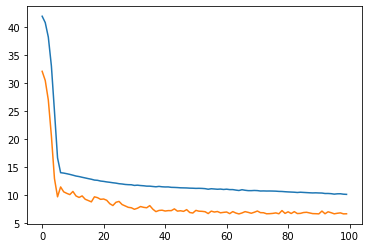

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(100), history.history["mae"])
plt.plot(range(100), history.history["val_mae"])
plt.show()

In [20]:
prediction = model.evaluate(x_test, y_test)
print(prediction)


10/10 [==============================] - 0s 1ms/step - loss: 324.4833 - mae: 15.9289
[324.4832763671875, 15.928938865661621]


In [21]:
# Prediction
model.predict([[ 0.19933844, -0.85647184, -0.8467326 ,  1.003676  , -1.0386382 ,
        0.0139037 ,  0.54155266, -0.27959728]])

array([[9.545071]], dtype=float32)